In [17]:
!pip install google-cloud-bigquery
!pip install google-auth
!pip install pandas_gbq
!pip install db-dtypes


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Como Instalar a CLI do Google Cloud
[Link Instalação CLI do Google Cloud](https://cloud.google.com/sdk/docs/install-sdk?hl=pt-br)

In [1]:
!gcloud init

^C


In [8]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [21]:
!pip install db-dtypes


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas_gbq


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
import pandas_gbq as pd
from google.cloud import bigquery
from google.oauth2 import service_account

# Construct a BigQuery client object.
#client = bigquery.Client()

# Set the project ID (optional, but recommended).  Replace with your project ID.
# client = bigquery.Client(project="your-project-id") # If ADC isn't sufficient.

# Construct a Standard SQL query.
query = '''select
                sigla_uf,
                a002 as idade,
                a003 as sexo,
                a004 as cor,
                a005 as escolaridade,
                b002 as Foi_estabelecimento_saude,
                b0041 as posto_saude_ubs,
                b0042 as pronto_socorro,
                b0043 as hospital_sus,
                b0044 as ambulatorio_privado,
                b0045 as pronto_socorro_privado,
                b0046 as hospital_privado,
                b005 as Ficou_internado_por_24h,
                b0033 as auto_medicacao,
                b006 as Foi_sedado_intubado,
                b007 as Tem_plano_saude_particular_empresa_publico,
                b008 as fez_teste_para_coronavirus,
                b009a as Fez_teste_cotonete,
                b009b as resultado_cotonete,
                b009c as Fez_coleta_sangue_furo_dedo,
                b009d as resultado_coleta_sangue,
                b009e as Fez_coleta_sangue_veia_braco,
                b009f as resultado_coleta_veia,
                b0101 as diagnostico_diabetes,
                b0102 as diagnostico_hipertensao,
                b0103 as diagnostico_asma,
                b0104 as diagnostico_coracao,
                b0105 as diagnostico_depressao,
                b0106 as diagnostico_cancer,
                b011 as restringiu_contato,
                c001 as trabalhou,
                c002 as estava_afastado,
                c006 as tem_mais_um_trabalho,
                c007 as tipo_trabalho,
                c010 as remuneracao,
                c0101 as valor_em_dinheiro,
                c01011 as faixa_renda,
                c01012 as valor_reais,
                e001 as solicitou_emprestimo,
                e0021 as emprestimo_banco,
                e0022 as emprestimo_parente,
                e0023 as emprestimo_patrao,
                e0024 as emprestimo_outro_local,
                f001 as tipo_domicilio,
                f0021 as valor_aluguel,
                f0022 as faixa_aluguel,
                f002a1 as tem_sabao_detergente,
                f002a2 as tem_alcool,
                f002a3 as tem_mascaras,
                f002a4 as tem_luvas_desc,
                f002a5 as tem_agua_sanitaria
                FROM `basedosdados.br_ibge_pnad_covid.microdados`
                where mes in (8,9,10) and b0033 is not null limit 2000 




        '''


credentials = service_account.Credentials.from_service_account_file(filename='GBQ.json', scopes=['https://www.googleapis.com/auth/cloud-platform'] )


df_microdados = pd.read_gbq(credentials=credentials, query_or_table=query)



Downloading: 100%|██████████|


In [118]:
df_microdados['auto_medicacao']

0       1
1       1
2       2
3       1
4       1
       ..
1995    2
1996    1
1997    2
1998    1
1999    1
Name: auto_medicacao, Length: 2000, dtype: object

In [ ]:
df_microdados['b0011'] = df_microdados['b0011'].dropna()

In [14]:
import pandas as pandas

In [15]:
df_microdados['b0011'] = pandas.to_numeric(df_microdados['b0011'])

<Axes: xlabel='rm_ride'>

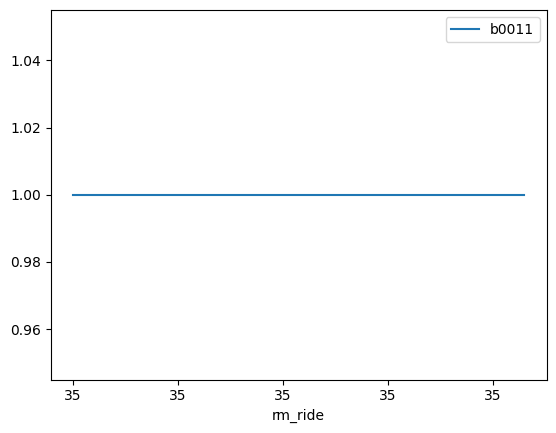

In [16]:
import matplotlib as plt

df_microdados.plot(x='rm_ride', y='b0011')

In [3]:
df_microdados.describe()

,ano,mes,semana,v1008,v1016,v1030,v1031,v1032,a001,a001b1,...,c011a22,d0013,d0023,d0033,d0043,d0053,d0063,d0073,f0021,f006
count,861.0,861.0,861.0,861.0,861.0,861.0,861.000000,861.000000,861.0,861.0,...,3.000000,230.000000,54.000000,79.000000,15.000000,378.000000,35.000000,60.000000,217.000000,823.0
mean,2020.0,7.368177,2.481998,8.038328,3.368177,3116012.465738,1496.999517,1680.589957,2.110337,18.279907,...,680.000000,2386.317391,695.888889,165.392405,1143.000000,803.230159,1360.771429,1935.416667,980.811060,1.54435
std,0.0,2.066423,1.12734,4.112055,2.066423,595537.356264,723.055838,845.379776,1.262389,17.080573,...,552.449093,2293.981084,1076.386437,70.199243,253.270042,441.203614,349.663038,2395.720990,764.194012,0.883845
min,2020.0,5.0,1.0,1.0,1.0,1306545.0,18.013500,18.344810,1.0,1.0,...,240.000000,150.000000,42.000000,41.000000,1045.000000,300.000000,1045.000000,55.000000,200.000000,1.0
25%,2020.0,6.0,1.0,4.0,2.0,2930552.0,1130.975000,1219.601000,1.0,9.0,...,370.000000,1045.000000,200.000000,100.000000,1045.000000,600.000000,1045.000000,450.000000,600.000000,1.0
50%,2020.0,7.0,2.0,8.0,3.0,3231532.0,1516.607000,1644.311000,2.0,16.0,...,500.000000,1700.000000,330.000000,170.000000,1045.000000,600.000000,1300.000000,1045.000000,800.000000,1.0
75%,2020.0,9.0,4.0,12.0,5.0,3512968.0,1854.602000,2128.235000,3.0,23.0,...,900.000000,3000.000000,575.000000,200.000000,1047.500000,1200.000000,1300.000000,2000.000000,1000.000000,2.0
max,2020.0,11.0,4.0,14.0,7.0,3835981.0,6209.240000,7013.948000,8.0,99.0,...,1300.000000,15000.000000,7000.000000,430.000000,2000.000000,3600.000000,2339.000000,11000.000000,6000.000000,6.0


In [97]:
df_microdados['a005'].isnull().sum()

null_count =df_microdados['a005'].sum().sum()
print('Number of null values:', null_count)

: 

: 

In [ ]:
import pandas_gbq as pd
from google.cloud import bigquery
from google.oauth2 import service_account

# Construct a BigQuery client object.
#client = bigquery.Client()

# Set the project ID (optional, but recommended).  Replace with your project ID.
# client = bigquery.Client(project="your-project-id") # If ADC isn't sufficient.

# Construct a Standard SQL query.
query = "SELECT * FROM `basedosdados.br_ibge_pnad_covid.dicionario` "


credentials = service_account.Credentials.from_service_account_file(filename='GBQ.json', scopes=['https://www.googleapis.com/auth/cloud-platform'] )


df_dicionario = pd.read_gbq(credentials=credentials, query_or_table=query)
df_dicionario


Downloading: 100%|██████████|


,id_tabela,nome_coluna,chave,cobertura_temporal,valor
0,microdados,f0022,0,2020-05(1)2020-11,1 - 100
1,microdados,b011,1,2020-05(1)2020-11,"Não fez restrição, levou vida normal como ante..."
2,microdados,c016,1,2020-05(1)2020-11,"Devido à pandemia (isolamento, quarentena ou d..."
3,microdados,a003,1,2020-05(1)2020-11,Homem
4,microdados,a004,1,2020-05(1)2020-11,Branca
...,...,...,...,...,...
549,microdados,b009d,4,2020-05(1)2020-11,Ainda não recebeu o resultado
550,microdados,b009f,4,2020-05(1)2020-11,Ainda não recebeu o resultado
551,microdados,b009b,4,2020-05(1)2020-11,Ainda não recebeu o resultado
552,microdados,c011a,1,2020-05(1)2020-11,Indica se o quesito foi respondido


In [49]:
def byPass(data):
    print(data)

In [73]:
colunas = {}
for i, infos in df_dicionario.iterrows():
    if infos.nome_coluna in df_microdados.columns:
       colunas[infos.nome_coluna]= infos.valor

print(colunas)

{'f0022': '50.001 - 100.000', 'b011': 'Ignorado', 'c016': 'Não aplicável', 'a003': 'Mulher', 'a004': 'Ignorado', 'c007': 'Não aplicável', 'a006a': 'Não aplicável', 'c005': 'Não aplicável', 'c007e': 'Não aplicável', 'a009': 'Não aplicável', 'c007a': 'Não aplicável', 'a007': 'Não aplicável', 'a007a': 'Não aplicável', 'a008': 'Não aplicável', 'c007d': 'Não aplicável', 'v1022': 'Rural', 'c003': 'Não aplicável', 'a006b': 'Não aplicável', 'e001': 'Não solicitou', 'f001': 'Outra condição', 'f0061': 'Ignorado', 'a001a': 'Parente do(a) empregado(a) doméstico(a)', 'v1023': 'Resto da UF (Unidade da Federação, excluindo a região metropolitana e a RIDE)', 'a005': 'Pós-graduação, mestrado ou doutorado', 'c007c': 'Não aplicável', 'c007b': 'Não aplicável', 'b005': 'Não aplicável', 'c0103': 'Não aplicável', 'c004': 'Não aplicável', 'c0104': 'Não aplicável', 'capital': 'Município de Brasília (DF)', 'rm_ride': 'Região Metropolitana de Goiânia (GO)', 'f002a5': 'Não sabe', 'b00111': 'Não sabe', 'd0011': 'N

In [71]:
new_df = df_microdados.copy()
new_df

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,v1008,v1016,...,f001,f0021,f0022,f002a1,f002a2,f002a3,f002a4,f002a5,f0061,f006
0,2020,5,2,AC,None,None,1250010,120000055,1,1,...,2,NaN,None,None,None,None,None,None,1,3
1,2020,5,2,AC,None,None,1250010,120000055,1,1,...,2,NaN,None,None,None,None,None,None,1,3
2,2020,5,2,AC,None,None,1250010,120000055,1,1,...,2,NaN,None,None,None,None,None,None,1,3
3,2020,5,1,AC,None,None,1250010,120000055,2,1,...,1,NaN,None,None,None,None,None,None,1,1
4,2020,5,1,AC,None,None,1250010,120000055,2,1,...,1,NaN,None,None,None,None,None,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,5,4,AC,None,None,1250010,120002026,9,1,...,1,NaN,None,None,None,None,None,None,1,1
996,2020,5,4,AC,None,None,1250010,120002026,9,1,...,1,NaN,None,None,None,None,None,None,1,1
997,2020,5,4,AC,None,None,1250010,120002026,11,1,...,1,NaN,None,None,None,None,None,None,1,1
998,2020,5,4,AC,None,None,1250010,120002026,11,1,...,1,NaN,None,None,None,None,None,None,1,1


In [76]:
new_df.rename(columns=colunas, inplace=True)

In [82]:
new_df[new_df['sigla_uf'] == 'AC']

,ano,mes,semana,sigla_uf,Município de Brasília (DF),Região Metropolitana de Goiânia (GO),estrato,upa,v1008,v1016,...,Outra condição,f0021,50.001 - 100.000,Não sabe,Não sabe,Não sabe,Não sabe,Não sabe,Ignorado,f006
0,2020,5,2,AC,None,None,1250010,120000055,1,1,...,2,NaN,None,None,None,None,None,None,1,3
1,2020,5,2,AC,None,None,1250010,120000055,1,1,...,2,NaN,None,None,None,None,None,None,1,3
2,2020,5,2,AC,None,None,1250010,120000055,1,1,...,2,NaN,None,None,None,None,None,None,1,3
3,2020,5,1,AC,None,None,1250010,120000055,2,1,...,1,NaN,None,None,None,None,None,None,1,1
4,2020,5,1,AC,None,None,1250010,120000055,2,1,...,1,NaN,None,None,None,None,None,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,5,4,AC,None,None,1250010,120002026,9,1,...,1,NaN,None,None,None,None,None,None,1,1
996,2020,5,4,AC,None,None,1250010,120002026,9,1,...,1,NaN,None,None,None,None,None,None,1,1
997,2020,5,4,AC,None,None,1250010,120002026,11,1,...,1,NaN,None,None,None,None,None,None,1,1
998,2020,5,4,AC,None,None,1250010,120002026,11,1,...,1,NaN,None,None,None,None,None,None,1,1


In [15]:
df_dicionario.to_excel('dicionario.xlsx')